In [1]:
import csv

data_reader = csv.DictReader(open('../../DATA/CrowdstormingDataJuly1st.csv', 'r'))   # Open datafile
data = []
for c,row in enumerate(data_reader):    # Create list of dics from the DictReader object
    data.append(row)
print (data[:2])

[{'playerShort': 'lucas-wilchez', 'player': 'Lucas Wilchez', 'club': 'Real Zaragoza', 'leagueCountry': 'Spain', 'birthday': '31.08.1983', 'height': '177', 'weight': '72', 'position': 'Attacking Midfielder', 'games': '1', 'victories': '0', 'ties': '0', 'defeats': '1', 'goals': '0', 'yellowCards': '0', 'yellowReds': '0', 'redCards': '0', 'photoID': '95212.jpg', 'rater1': '0.25', 'rater2': '0.5', 'refNum': '1', 'refCountry': '1', 'Alpha_3': 'GRC', 'meanIAT': '0.326391469021736', 'nIAT': '712', 'seIAT': '0.000564112354334542', 'meanExp': '0.396', 'nExp': '750', 'seExp': '0.0026964901062936'}, {'playerShort': 'john-utaka', 'player': 'John Utaka', 'club': 'Montpellier HSC', 'leagueCountry': 'France', 'birthday': '08.01.1982', 'height': '179', 'weight': '82', 'position': 'Right Winger', 'games': '1', 'victories': '0', 'ties': '0', 'defeats': '1', 'goals': '0', 'yellowCards': '1', 'yellowReds': '0', 'redCards': '0', 'photoID': '1663.jpg', 'rater1': '0.75', 'rater2': '0.75', 'refNum': '2', 'ref

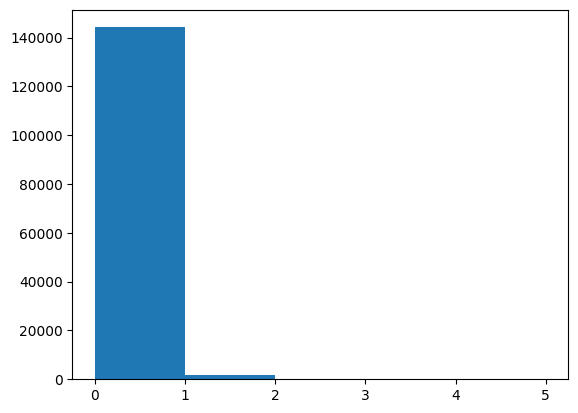

In [2]:
import matplotlib.pyplot as p  # Import for visualizations

redCards = [float(row["redCards"]) for row in data]

# Create a histogram
p.figure(1)
n, bins, patches = p.hist(redCards,bins=5,range=(0,5))
p.show()

In [4]:
import numpy as n  # Import numpy library

print(n.var([float(row["redCards"]) for row in data]))
print(n.mean([float(row["redCards"]) for row in data]))

0.01274390091362882
0.012559235215164215


In [6]:
import scipy.stats as s 

# Check IRR of ratings
rater1 = [float(row["rater1"]) for row in data if "NA" not in [row["rater1"],row["rater2"]]]
rater2 = [float(row["rater2"]) for row in data if "NA" not in [row["rater1"],row["rater2"]]]

# Print results of scipy's normality test (based off D'Agostino-Pearson normality test)
print(s.stats.normaltest(rater1, axis=0))
print(s.stats.normaltest(rater2, axis=0))

NormaltestResult(statistic=np.float64(17807.487876428764), pvalue=np.float64(0.0))
NormaltestResult(statistic=np.float64(16465.879873231916), pvalue=np.float64(0.0))


/tmp/ipykernel_26232/2058919319.py:8: DeprecationWarning: Please import `normaltest` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  print(s.stats.normaltest(rater1, axis=0))
/tmp/ipykernel_26232/2058919319.py:9: DeprecationWarning: Please import `normaltest` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  print(s.stats.normaltest(rater2, axis=0))


In [7]:
print("Spearman: ", s.spearmanr(rater1,rater2))

Spearman:  SignificanceResult(statistic=np.float64(0.8576416920986697), pvalue=np.float64(0.0))


In [9]:
import pandas

df = pandas.read_csv('../../DATA/CrowdstormingDataJuly1st.csv')
keys = ['playerShort','refNum','games','goals','yellowCards','redCards','position','meanIAT','meanExp', 'rater1', 'rater2','club','leagueCountry']
df = df[keys]
print (df[:3])



     playerShort  refNum  games  goals  yellowCards  redCards  \
0  lucas-wilchez       1      1      0            0         0   
1     john-utaka       2      1      0            1         0   
2    abdon-prats       3      1      0            1         0   

               position   meanIAT   meanExp  rater1  rater2             club  \
0  Attacking Midfielder  0.326391  0.396000    0.25    0.50    Real Zaragoza   
1          Right Winger  0.203375 -0.204082    0.75    0.75  Montpellier HSC   
2                   NaN  0.369894  0.588297     NaN     NaN     RCD Mallorca   

  leagueCountry  
0         Spain  
1        France  
2         Spain  


In [10]:
# Drop NA ratings and make an average
df = df.dropna(subset=['rater1','rater2'])
df['rating'] = (df['rater1'] + df['rater2']) / 2
print(df[:3])

     playerShort  refNum  games  goals  yellowCards  redCards  \
0  lucas-wilchez       1      1      0            0         0   
1     john-utaka       2      1      0            1         0   
5   aaron-hughes       4      1      0            0         0   

               position   meanIAT   meanExp  rater1  rater2             club  \
0  Attacking Midfielder  0.326391  0.396000    0.25    0.50    Real Zaragoza   
1          Right Winger  0.203375 -0.204082    0.75    0.75  Montpellier HSC   
5           Center Back  0.325185  0.538462    0.25    0.00        Fulham FC   

  leagueCountry  rating  
0         Spain   0.375  
1        France   0.750  
5       England   0.125  


In [11]:
positions = df.groupby(['position'])
positions['goals'].mean() / positions['games'].mean()

position
Attacking Midfielder    0.162301
Center Back             0.051606
Center Forward          0.319852
Center Midfielder       0.122160
Defensive Midfielder    0.061550
Goalkeeper              0.000303
Left Fullback           0.038574
Left Midfielder         0.126883
Left Winger             0.231471
Right Fullback          0.034196
Right Midfielder        0.119648
Right Winger            0.245183
dtype: float64

In [12]:
before_drop = len(df)
df = df.dropna(subset=['position'])  
print ("rows dropped: ", before_drop - len(df))

def f(x):
    positionDict = {"Attacking Midfielder" : "Midfield", "Center Back" : "Defense", "Center Forward" : "Offense", "Center Midfielder" : "Midfield", "Defensive Midfielder" : "Defense", "Goalkeeper" : "Goalkeeper", "Left Fullback" : "Defense", "Left Midfielder" : "Midfield", "Left Winger" : "Offense", "Right Fullback" : "Defense", "Right Midfielder" : "Midfield", "Right Winger" : "Offence"}
    return positionDict[x]
df['positionGroup'] = df['position'].apply(f,1)

print (df[:10]['positionGroup'])

rows dropped:  8461
0       Midfield
1        Offence
5        Defense
6        Defense
7        Defense
8     Goalkeeper
9        Defense
10       Defense
11       Offense
12       Defense
Name: positionGroup, dtype: object


/tmp/ipykernel_26232/2733172006.py:8: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df['positionGroup'] = df['position'].apply(f,1)
/tmp/ipykernel_26232/2733172006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positionGroup'] = df['position'].apply(f,1)


In [13]:
before_drop = len(df)
df = df.dropna(subset=['meanIAT', 'meanExp'])
print ("rows dropped: ", before_drop - len(df))

df['meanIAT'] = df['meanIAT'] * 100
df['meanExp'] = df['meanExp'] * 100
print(df[:3])


rows dropped:  146
     playerShort  refNum  games  goals  yellowCards  redCards  \
0  lucas-wilchez       1      1      0            0         0   
1     john-utaka       2      1      0            1         0   
5   aaron-hughes       4      1      0            0         0   

               position    meanIAT    meanExp  rater1  rater2  \
0  Attacking Midfielder  32.639147  39.600000    0.25    0.50   
1          Right Winger  20.337472 -20.408163    0.75    0.75   
5           Center Back  32.518515  53.846154    0.25    0.00   

              club leagueCountry  rating positionGroup  
0    Real Zaragoza         Spain   0.375      Midfield  
1  Montpellier HSC        France   0.750       Offence  
5        Fulham FC       England   0.125       Defense  


In [14]:
exposure_array = df['games'].values

# Analysis

In [15]:
import numpy as np 
import statsmodels.api as sm
from patsy import dmatrices

# Create + fit poisson model
def test_question(y, X, exposure_array):  
    poisson_mod = sm.Poisson(y, X, exposure=exposure_array)
    poisson_res = poisson_mod.fit()
    print (poisson_res.summary())
    # print (np.exp(poisson_res.params))



This function takes a patsy dmatrices frame and fits a Poisson model with it, using exposure_array (defined above) as an exposure variable. We multiply each of our variables by the variable of interest, rating, in order to determine the unique effects of rating when other variables are controlled for:


In [16]:
# Define x and y 
y, X = dmatrices('redCards ~ rating + rating*goals + rating*positionGroup + rating*yellowCards + rating*meanIAT + rating*meanExp', data=df, return_type='dataframe')

test_question(y, X, exposure_array)

Optimization terminated successfully.
         Current function value: 0.062406
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:               redCards   No. Observations:               116014
Model:                        Poisson   Df Residuals:                   115996
Method:                           MLE   Df Model:                           17
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                0.007824
Time:                        10:01:11   Log-Likelihood:                -7240.0
converged:                       True   LL-Null:                       -7297.1
Covariance Type:            nonrobust   LLR p-value:                 1.965e-16
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -7.5088      0.790    

### Results

The key results here are in the first column - the regression coefficients. A regression coefficient can be interpreted as: "for a one unit change in the predictor variable, the difference in the logs of expected counts is expected to change by the respective regression coefficient, given the other predictor variables in the model are held constant." (source) In order to better interpret this result, as well as to provide a standardized results that can be compared directly to other researchers' analyses, we'll transform this into an incidence rate ratio. We can do this by exponentiating the coefficients using numpy's exp function:

In [17]:
# The same function as above, but displaying different output.
def test_question(y, X, exposure_array):  
    poisson_mod = sm.Poisson(y, X, exposure=exposure_array)
    poisson_res = poisson_mod.fit()
    # print poisson_res.summary()
    print (np.exp(poisson_res.params))

test_question(y, X, exposure_array)

Optimization terminated successfully.
         Current function value: 0.062406
         Iterations 5
Intercept                             0.000548
positionGroup[T.Goalkeeper]           1.039091
positionGroup[T.Midfield]             0.555981
positionGroup[T.Offence]              0.845336
positionGroup[T.Offense]              0.659383
rating                                8.235204
rating:positionGroup[T.Goalkeeper]    0.389701
rating:positionGroup[T.Midfield]      1.576794
rating:positionGroup[T.Offence]       0.841944
rating:positionGroup[T.Offense]       1.077177
goals                                 0.975218
rating:goals                          0.990290
yellowCards                           1.060577
rating:yellowCards                    0.879504
meanIAT                               1.062622
rating:meanIAT                        0.946804
meanExp                               0.999861
rating:meanExp                        1.003863
dtype: float64


### Question 1

We can interpret these exponentiated coeffients (IRRs) as the change to the rate of the dependent variable (redCards) given an increase in one unit of the predictor variable (rating). Because interaction terms have been included, this is the change when all other variables are zero.

This result, 8.235204, can be interpreted as, "For each increase of 1 in the rating variable, a player is 8.235204 times more likely to receive a red card." Keep in mind, though, that ratings range from 0-1. An alternative interpretation is thus, "A player whose skin was rated as darkest is 8.235204 more likely than a player whose skin was rated lighest to receive a red card."

It is also worth noting the standard error, confidence interval, etc in the original summary:

coef    std err          z      P>|z|      [95.0% Conf. Int.]

2.1084      1.525      1.382      0.167        -0.881     5.098

It is hard to have much confidence in our results.

### Question 2a

For this question, we want to look not just at the influence of ratings on redCards but the influence of meanIAT on the influence of ratings on redCards. The interaction coefficient is therefore what we're interested in:

coef    std err          z      P>|z|      [95.0% Conf. Int.]

-0.0547      0.051     -1.071      0.284        -0.155     0.045

The IRR is:

rating:meanIAT                        0.946804

This result shows the increased influence of ratings on redCards based on a difference of 1 meanIAT.



### Question 2b

For this question, we want to look not just at the influence of ratings on redCards but the influence of meanExp on the influence of ratings on redCards. The interaction coefficient is therefore what we're interested in:

coef    std err          z      P>|z|      [95.0% Conf. Int.]

0.0039      0.008      0.514      0.607        -0.011     0.019

The IRR is:

rating:meanIAT                        1.003863

This result shows the increased influence of ratings on redCards based on a difference of 1 meanExp.



### Conclusion

In this analysis, we asked two questions: whether soccer referees were more likely to give red cards to dark skin toned players than light skin toned players, and whether implicit or explicit skin-tone prejudice in the country of origin of the referee moderated this preference. To test this question, we used a dataset consisting of dyads of players and referees, the number of red cards given by referees to the players, ratings of the player's skin-tone, and several other variables of interest. Given the heavily right-skewed count distribution of the red cards, we chose to use a poisson regression as our model. Number of games was used as an exposure variable, with goals, position, yellow cards, and country-of-origin-wide bias measures, meanIAT (implicit) and meanExp (explicit) included in the model. Although the data was hierarchical, with players embedded in teams embedded in leagues, the information provided was deemed inadequate to use for a hierarchical model. All dyads missing any of this data was excluded, leaving X total observations. We found an incidence rate ratio of 8.235204 for ratings, suggesting that a player whose skin was rated as darkest was 8.235204 more likely than a player whose skin was rated lighest to receive a red card. However this difference was not significant, with a large error (1.525) and wide confidence intervals (-0.881, 5.098) around the regression coefficient found (2.1084). Our analysis found a light negative impact of meanIAT on the influence of skin-tone in the form of an IRR of 0.946804. Again, it is difficult to have confidence in the result (coeff: -0.0547; std error: 0.051; p: 0.284; CI: -0.155, 0.045). Finally we found a slight positive impact of meanExp on the influence of skin-tone in the form of an IRR of 1.003863 (coeff: 0.0039; std error: 0.008; p: 0.607; CI: -0.011, 0.019). These results do not allow us to infer an influence of skin-tone on the # of red cards given. This does not allow us to say that an effect does not exist: a different methodology, or a different dataset (perhaps one with IAT or Exp measures for individual referees, or more comprehensive team and country data allowing hierarchical modeling) might find better evidence.
